In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory,to_categorical
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def load_data(dir,image_size=(32,32)):
    data=image_dataset_from_directory(dir,image_size=image_size)
    images,labels=[],[]
    for x,y in data:
        images.append(x.numpy().astype('float32')/255.0)
        labels.append(y.numpy())
    X=np.concatenate(images)
    Y=np.concatenate(labels)
    Y=to_categorical(Y,10)
 
    return X,Y

In [13]:
X,Y=load_data('D:\\Source_code\\Lab\\data\\cifar10\\train')
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)


Found 50000 files belonging to 10 classes.


In [19]:
def build_model(kernal,dropout,regular):
    reg=l2(0.001) if regular else None

    model=Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(512,activation='relu',kernel_initializer=kernal,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu',kernel_initializer=kernal,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu',kernel_initializer=kernal,kernel_regularizer=reg))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax',kernel_initializer=kernal,kernel_regularizer=reg))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [21]:
config={
    'xavier':['glorot_uniform',False,False],
    'xavier_with_dropout_and_reg':['glorot_uniform',True,True],
    'he':['he_uniform',False,False],
    'he_with_droupout_reg':['he_uniform',True,True]
}

logs={}

for name,(kernal,dropout,regularizer) in config.items():
    model=build_model(kernal,dropout,regularizer)
    log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)
    logs[name]=log.history


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3131 - loss: 1.8950 - val_accuracy: 0.3658 - val_loss: 1.7580
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3873 - loss: 1.7025 - val_accuracy: 0.3874 - val_loss: 1.6975
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4205 - loss: 1.6162 - val_accuracy: 0.4223 - val_loss: 1.6025
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4439 - loss: 1.5552 - val_accuracy: 0.4555 - val_loss: 1.5203
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4580 - loss: 1.5130 - val_accuracy: 0.4444 - val_loss: 1.5504
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.1593 - loss: 2.7381 - val_accuracy: 0.2291 - val_loss: 2.2647
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1831 - loss: 2.2472 - val_accuracy: 0.2130 - val_loss: 2.1578
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1932 - loss: 2.1606 - val_accuracy

dict_items([('xavier', {'accuracy': [0.3130750060081482, 0.3873000144958496, 0.42054998874664307, 0.44385001063346863, 0.45797500014305115], 'loss': [1.8949555158615112, 1.7024608850479126, 1.6161926984786987, 1.555200457572937, 1.5129941701889038], 'val_accuracy': [0.36579999327659607, 0.3874000012874603, 0.4223000109195709, 0.4555000066757202, 0.44440001249313354], 'val_loss': [1.7580478191375732, 1.6974602937698364, 1.602489948272705, 1.520264983177185, 1.5503724813461304]}), ('xavier_with_dropout_and_reg', {'accuracy': [0.15929999947547913, 0.1830500066280365, 0.1932000070810318, 0.20157499611377716, 0.20727500319480896], 'loss': [2.7381250858306885, 2.247225522994995, 2.1605563163757324, 2.124274969100952, 2.103935480117798], 'val_accuracy': [0.22910000383853912, 0.21299999952316284, 0.2467000037431717, 0.21719999611377716, 0.20999999344348907], 'val_loss': [2.2647228240966797, 2.157768487930298, 2.0430049896240234, 2.085799217224121, 2.0909483432769775]}), ('he', {'accuracy': [0.

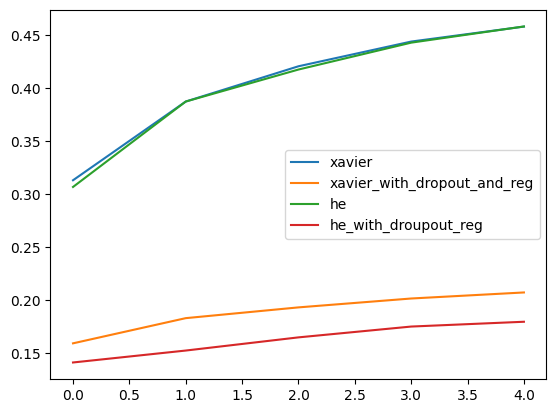

In [28]:
print(logs.items())
for name,history in logs.items():
    plt.plot(history['accuracy'],label=name)
plt.legend()
plt.show()